In [10]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1391


<Axes: xlabel='Time'>

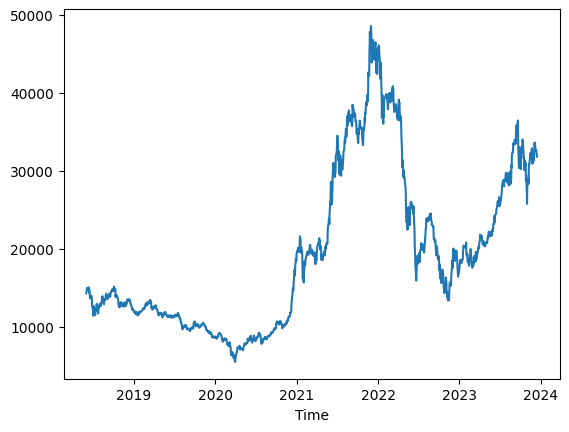

In [11]:
#2. Fetch data and visualize
SSI = stock_historical_data(symbol = "SSI", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
SSI
SSI["Close"].plot()

In [12]:
# Preprocessing
SSI['Lag'] = np.arange(len(SSI.index))
SSI = SSI[['Close', 'Lag']]
SSI

SSI = pd.DataFrame(SSI)
SSI.set_index("Lag", inplace= True)
SSI

,Close
Lag,
0,14270
1,14730
2,14770
3,14950
4,14700
...,...
1386,32700
1387,32600
1388,32000


In [13]:
#3. Slit the data into train : test with ratio 7:3
train_size = int(0.7 * len(SSI))
test_size = int(0.3 * len(SSI))

train_data = SSI[:train_size]
test_data = SSI[train_size:]

In [14]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[32168.04501795],
       [32197.61094649],
       [32227.17687502],
       [32256.74280356],
       [32286.3087321 ],
       [32315.87466063],
       [32345.44058917],
       [32375.0065177 ],
       [32404.57244624],
       [32434.13837477],
       [32463.70430331],
       [32493.27023184],
       [32522.83616038],
       [32552.40208892],
       [32581.96801745],
       [32611.53394599],
       [32641.09987452],
       [32670.66580306],
       [32700.23173159],
       [32729.79766013],
       [32759.36358866],
       [32788.9295172 ],
       [32818.49544573],
       [32848.06137427],
       [32877.62730281],
       [32907.19323134],
       [32936.75915988],
       [32966.32508841],
       [32995.89101695],
       [33025.45694548],
       [33055.02287402],
       [33084.58880255],
       [33114.15473109],
       [33143.72065962],
       [33173.28658816],
       [33202.8525167 ],
       [33232.41844523],
       [33261.98437377],
       [33291.5503023 ],
       [33321.11623084],


In [16]:
# 6. 60 days prediction
last_index =  SSI.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[44526.60314579]
 [44556.16907432]
 [44585.73500286]
 [44615.30093139]
 [44644.86685993]
 [44674.43278846]
 [44703.998717  ]
 [44733.56464554]
 [44763.13057407]
 [44792.69650261]
 [44822.26243114]
 [44851.82835968]
 [44881.39428821]
 [44910.96021675]
 [44940.52614528]
 [44970.09207382]
 [44999.65800236]
 [45029.22393089]
 [45058.78985943]
 [45088.35578796]
 [45117.9217165 ]
 [45147.48764503]
 [45177.05357357]
 [45206.6195021 ]
 [45236.18543064]
 [45265.75135917]
 [45295.31728771]
 [45324.88321625]
 [45354.44914478]
 [45384.01507332]
 [45413.58100185]
 [45443.14693039]
 [45472.71285892]
 [45502.27878746]
 [45531.84471599]
 [45561.41064453]
 [45590.97657307]
 [45620.5425016 ]
 [45650.10843014]
 [45679.67435867]
 [45709.24028721]
 [45738.80621574]
 [45768.37214428]
 [45797.93807281]
 [45827.50400135]
 [45857.06992988]
 [45886.63585842]
 [45916.20178696]
 [45945.76771549]
 [45975.33364403]
 [46004.89957256]
 [46034.4655011 ]
 [46064.03142963]

In [17]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 15507.985832539829
Testing MAPE: 70.73939163371656
Testing MAE: 14868.962170234547


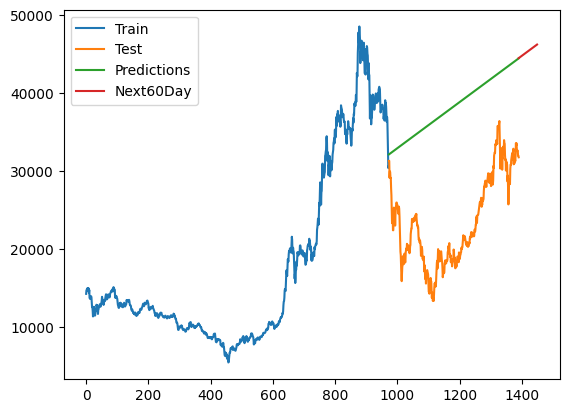

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()